<a href="https://colab.research.google.com/github/nithyap2209/Visualisation-of-High-Dimensional-Data-using-tSNE-/blob/main/tSNE_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

(1797, 64)


<Figure size 640x480 with 0 Axes>

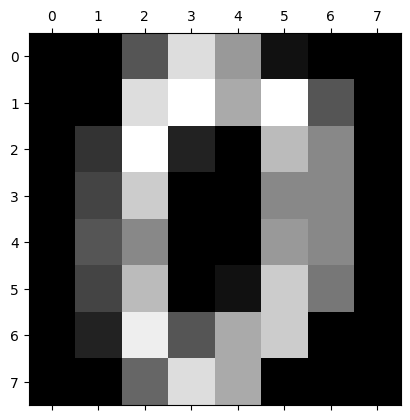

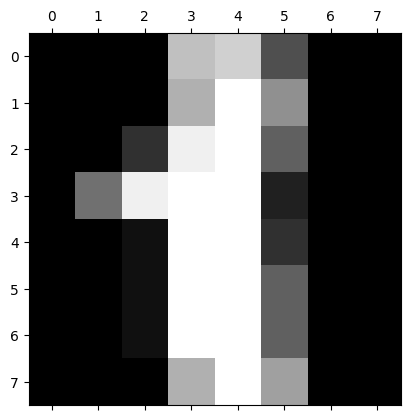

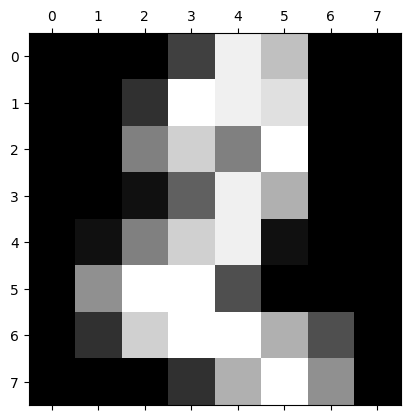

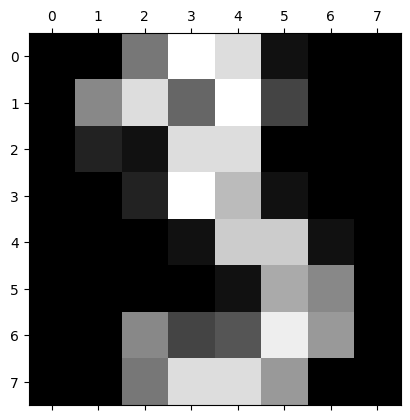

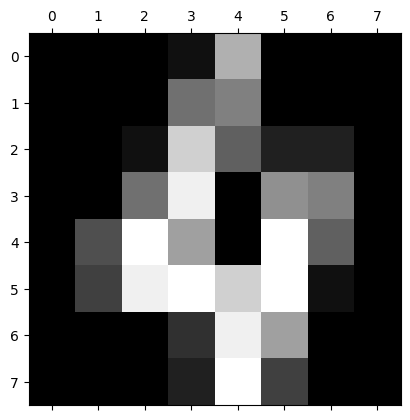

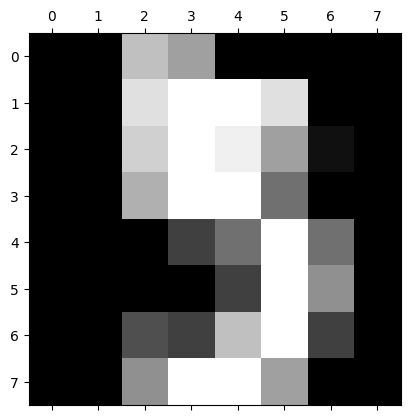

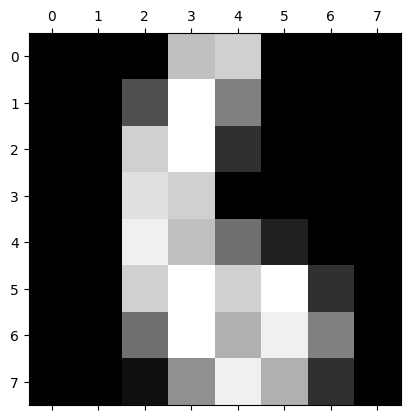

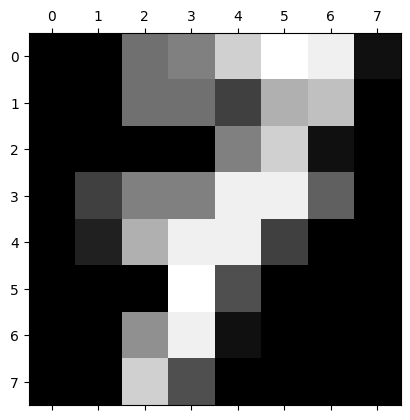

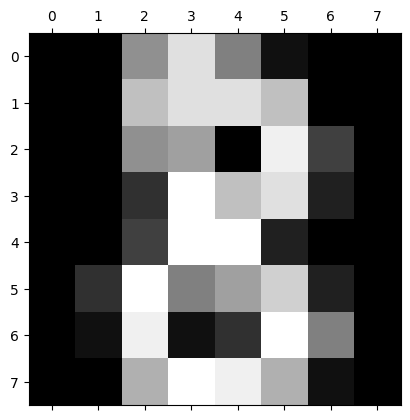

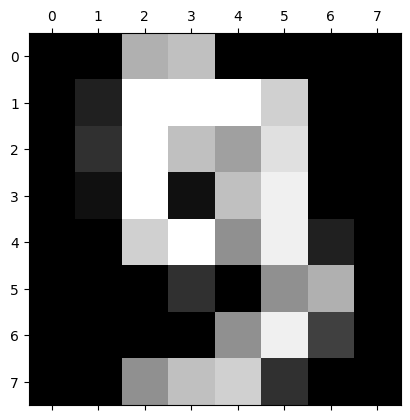

In [8]:
digits = load_digits()
print(digits.data.shape) # There are 10 classes (0 to 9) with alomst 180 images in each class
                         # The images are 8x8 and hence 64 pixels(dimensions)
plt.gray();
#Displaying what the standard images look like
for i in range(0,10):
    plt.matshow(digits.images[i])
    plt.show()

In [9]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

In [10]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=30).fit_transform(X)
#Play around with varying the parameters like perplexity, random_state to get different plots

In [11]:
#With the above line, our job is done. But why did we even reduce the dimensions in the first place?
#To visualise it on a graph.

#So, here is a utility function that helps to do a scatter plot of thee transformed data

def plot(x, colors):

    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts



<ipython-input-11-4f911765e638>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.4589775, 55.00486, '0'),
  Text(5.0942597, -12.734812, '1'),
  Text(-28.879602, -30.383986, '2'),
  Text(-38.22333, 1.9144967, '3'),
  Text(43.29138, -12.946265, '4'),
  Text(1.8330631, 19.533703, '5'),
  Text(34.20582, 21.615847, '6'),
  Text(8.368625, -43.622124, '7'),
  Text(-11.821753, -5.80387, '8'),
  Text(-22.835543, 17.705698, '9')])

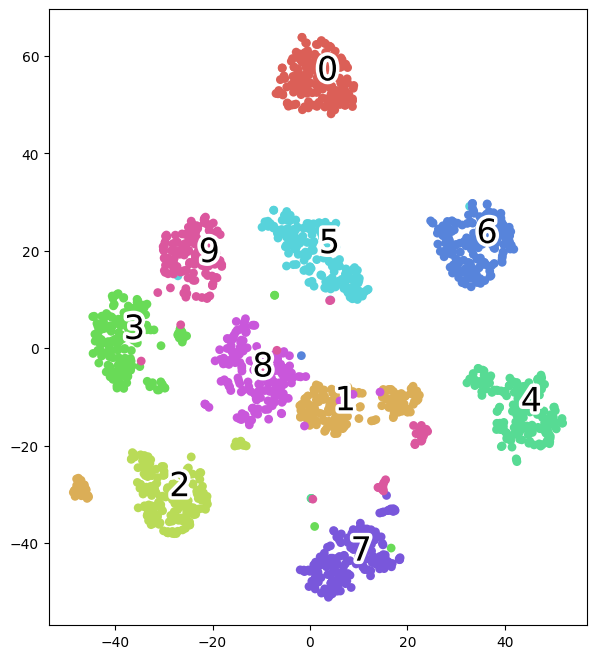

In [12]:
plot(digits_final,Y)